# Question D11

*Question*: Considering the ML-enabled system projects in which you participated, how agile do you rate your development?

*Answer Type*: Likert Option

*Options*: [Totally traditional, Mostly traditional, Balanced between agile and traditional, Mostly agile, Totally agile, I don't know]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

### Basic Analysis

In [4]:
dataframe_obj.df['D11_Agile_Development'].head()

0                       Totally traditional
1    Balanced between agile and traditional
2    Balanced between agile and traditional
3                             Totally agile
4    Balanced between agile and traditional
Name: D11_Agile_Development, dtype: object

In [5]:
# cleaning data
dataframe_obj.remove_value_from_df('0','D11_Agile_Development')
dataframe_obj.remove_value_from_df("I don't know",'D11_Agile_Development') # I don't know option is not important

In [6]:
indexes = list(dataframe_obj.df['D11_Agile_Development'].value_counts().index)
values = list(dataframe_obj.df['D11_Agile_Development'].value_counts())
chart_positions = []
for index in indexes:
    chart_positions.append(1 if "Others" not in index else 0)

In [7]:
indexes

['Mostly agile',
 'Balanced between agile and traditional',
 'Totally traditional',
 'Totally agile',
 'Mostly traditional']

In [8]:
# compute total of unique answers in this question
total_answers_int = len(dataframe_obj.df['D11_Agile_Development'])
total_answers = 'N = ' + str(len(dataframe_obj.df['D11_Agile_Development']))

In [9]:
# plot object
d11_plot = PlotUtils(pd.DataFrame(
    data={'Agility': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

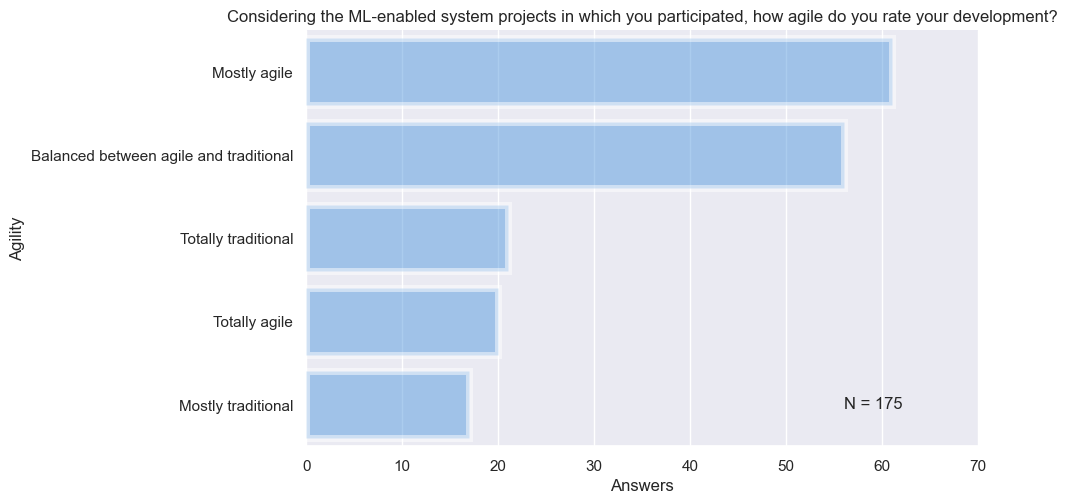

In [10]:
d11_plot.single_barplot(x_axis="Answers", y_axis="Agility",
                       title="Considering the ML-enabled system projects in which you participated, how agile do you rate your development?",
                       x_label="Answers", y_label="Agility", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

### Bootstrapping Analysis

In [11]:
valid_options_list = list(dataframe_obj.df['D11_Agile_Development'].unique())
valid_answers_list = list(dataframe_obj.df['D11_Agile_Development'])

In [12]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [13]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping('single')

In [14]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [15]:
values = [100 * v for v in values]

In [16]:
# plot object for bootstrapped data
d11_boot_plot = PlotUtils(pd.DataFrame(
    data={'Agility': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

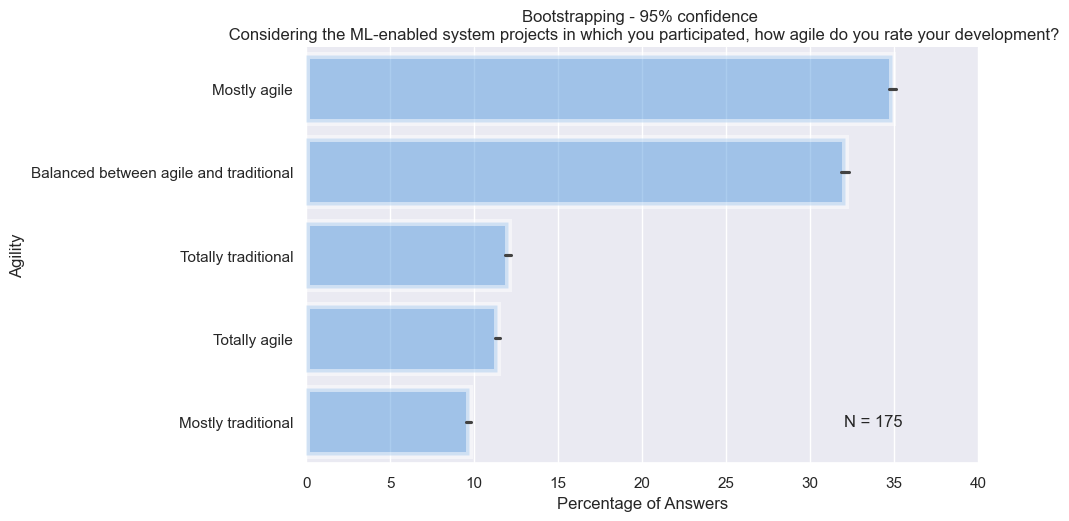

In [17]:
d11_boot_plot.single_barplot(x_axis="Value", y_axis="Agility", 
                       title="Bootstrapping - 95% confidence \n Considering the ML-enabled system projects in which you participated, how agile do you rate your development?",
                       x_label="Percentage of Answers", y_label="Agility", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [18]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Totally traditional:(0.11828025064827256, 0.12008000000000002, 0.12187974935172748)
Balanced between agile and traditional:(0.3182823652015357, 0.3205542857142857, 0.3228262062270357)
Totally agile:(0.11226674040276462, 0.1138, 0.11533325959723538)
Mostly agile:(0.34676553906459623, 0.3489028571428571, 0.351040175221118)
Mostly traditional:(0.09533025299392989, 0.09666285714285712, 0.09799546129178435)


In [19]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Totally traditional:: P = 12.008 [11.828, 12.188]
Balanced between agile and traditional:: P = 32.055 [31.828, 32.283]
Totally agile:: P = 11.38 [11.227, 11.533]
Mostly agile:: P = 34.89 [34.677, 35.104]
Mostly traditional:: P = 9.666 [9.533, 9.8]
